# Logistic Regression with Python in Machine Learning

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

### Logistic Regression
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

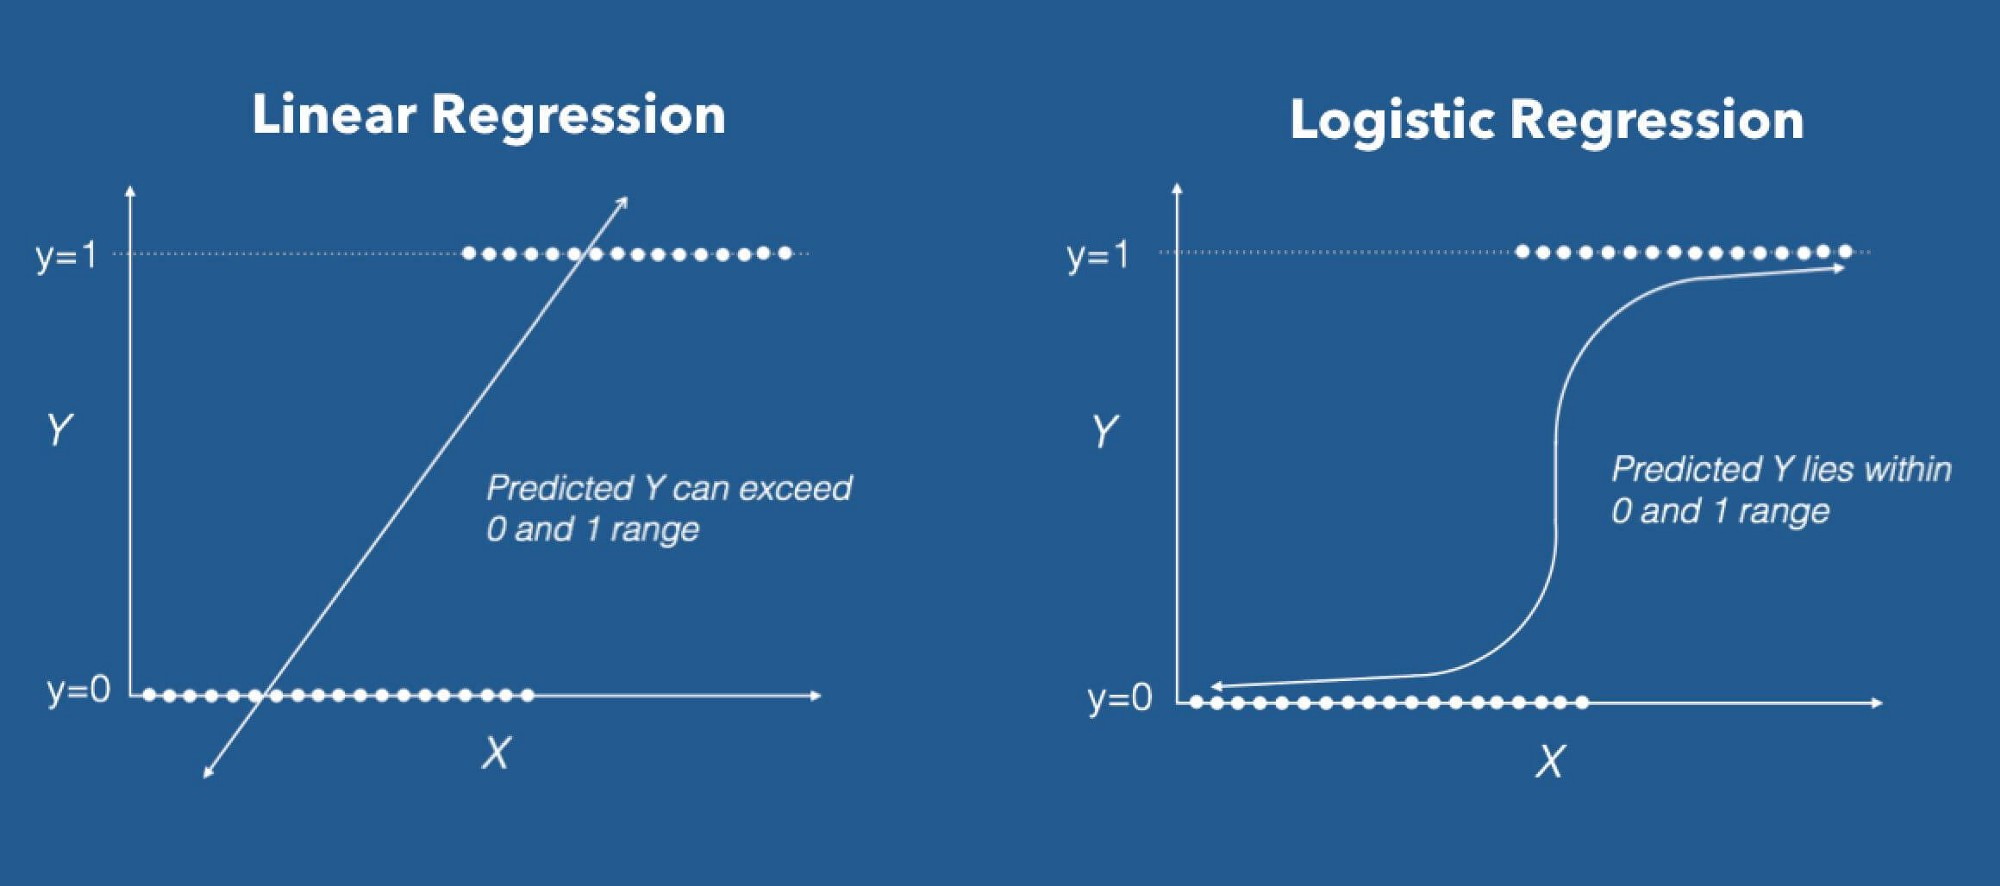

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

### What is the Sigmoid Function?

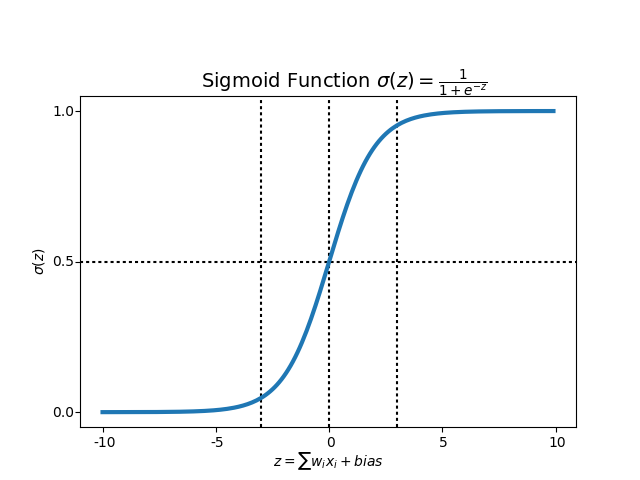

In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

### Decision Boundary

We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.

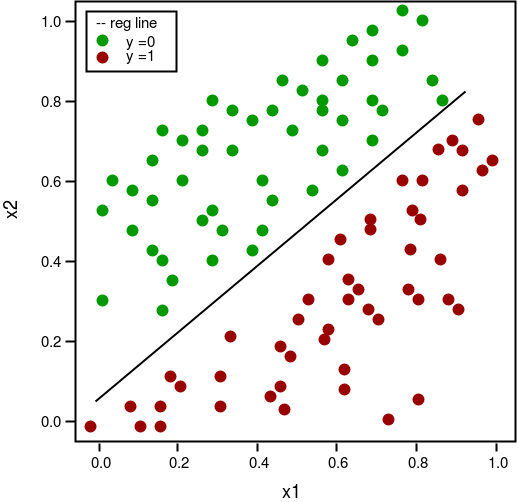

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

### Lets go ahead and build a model which can predict if a passenser is gonna survive

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
titanic = sns.load_dataset('titanic')

In [77]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [78]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##  Data understanding

In [79]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

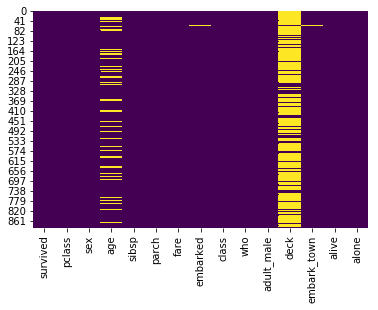

In [80]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [81]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

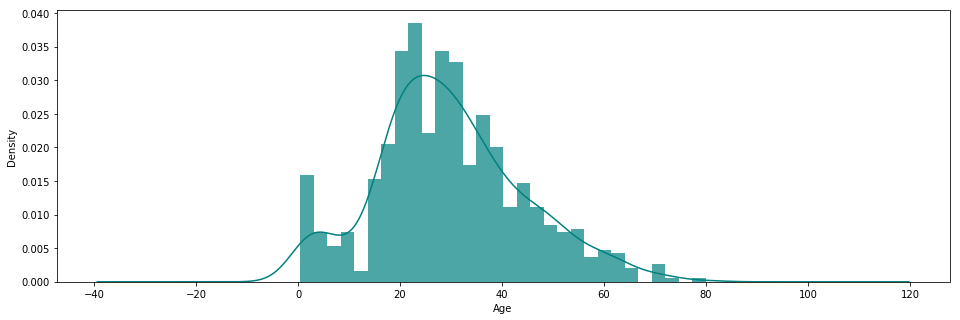

In [82]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

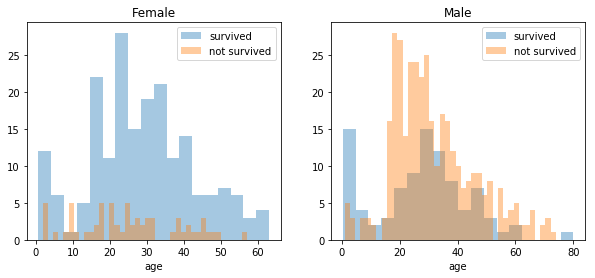

In [83]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']


ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [84]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

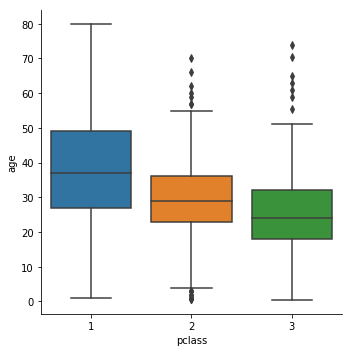

In [85]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

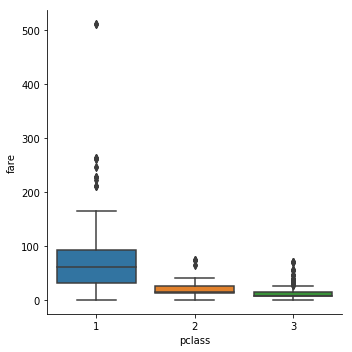

In [86]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box')

In [87]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [88]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [89]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

In [90]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [91]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis = 1)

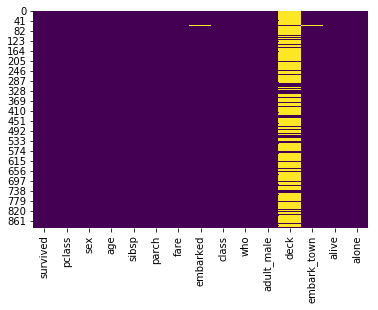

In [92]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

## Analysing Embarked 

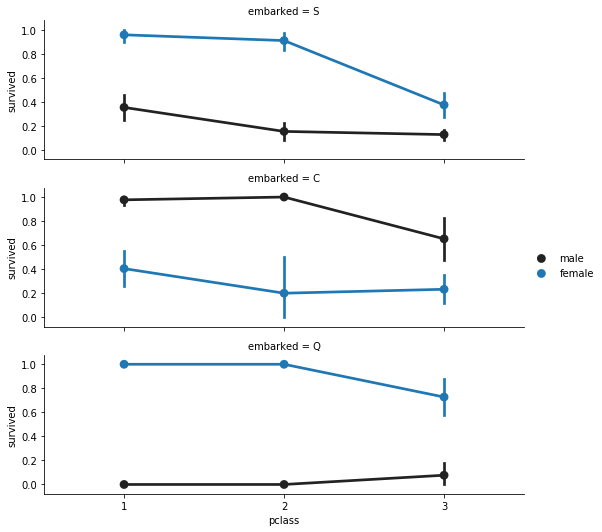

In [93]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [94]:
titanic['embarked'].isnull().sum()

2

In [95]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [96]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [97]:
titanic['embarked'].isnull().sum()

0

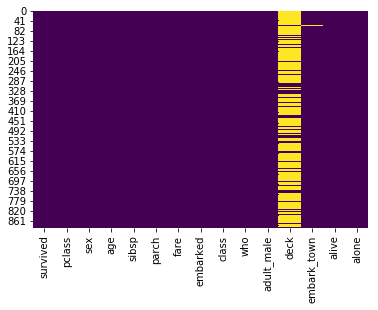

In [98]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [99]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

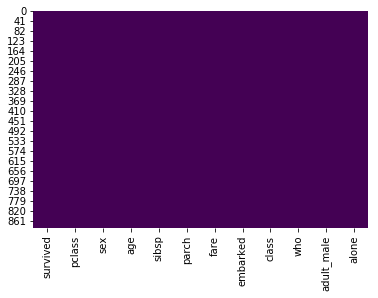

In [100]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [101]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           891 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.4+ KB


In [102]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [103]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


## convert categorical data into numerical data

In [104]:
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

In [105]:
who = {'man': 0, 'women': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

In [106]:
adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

In [107]:
alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)

In [108]:
ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [109]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0.0,1,0
1,1,1,1,38,1,0,71,1,First,NaN,0,0
2,1,3,1,26,0,0,7,0,Third,NaN,0,1
3,1,1,1,35,1,0,53,0,First,NaN,0,0
4,0,3,0,35,0,0,8,0,Third,0.0,1,1


In [110]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace= True)

In [111]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


### Build Logistic Regression Model

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [114]:
X_train.shape

(596, 9)

In [115]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [116]:
model.score(X_test, y_test)

0.8271186440677966

###  Let's go ahead with age and fare grouping 

#### Recursive Feature Elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a  feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

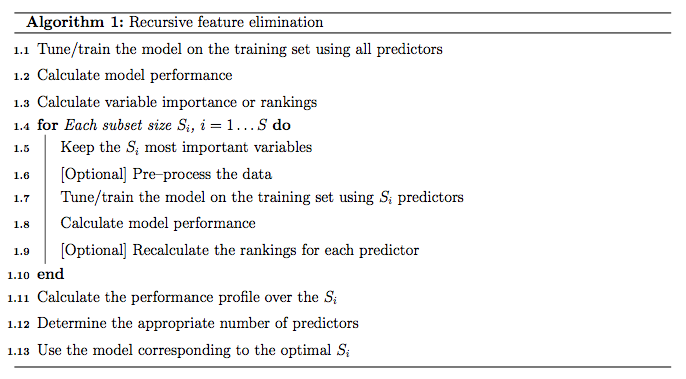

In [117]:
from sklearn.feature_selection import RFE

In [120]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [118]:
X.shape

(891, 9)

In [121]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [122]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1


In [123]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [124]:
XX = X[X.columns[rfe.support_]]

In [125]:
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [126]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

In [127]:
X_train.shape

(712, 5)

In [128]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [129]:
model.score(X_test, y_test)

0.8547486033519553

#### Accuracy, F1-Score, P, R, AUC_ROC curve

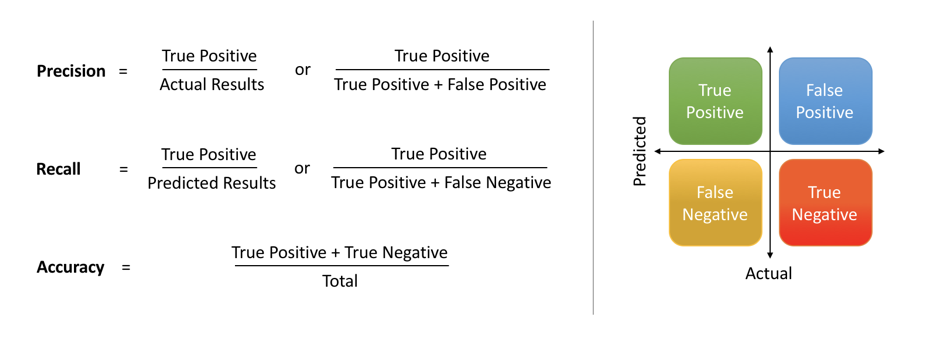

In [130]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [131]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [132]:
y_predict_prob = model.predict_proba(X_test)[:, 1]

In [133]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [136]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8547486033519553
log loss:  0.3659737372713988
auc:  0.9007246376811595


In [138]:
idx = np.min(np.where(tpr>0.95))
idx

27

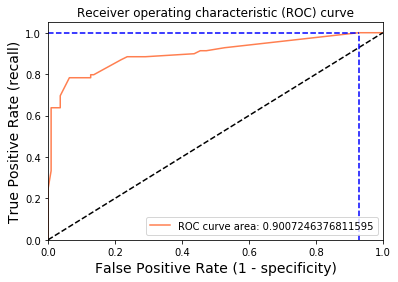

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [146]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Train/Test split results:
LogisticRegression accuracy is 0.844
LogisticRegression log_loss is 0.359
LogisticRegression auc is 0.904


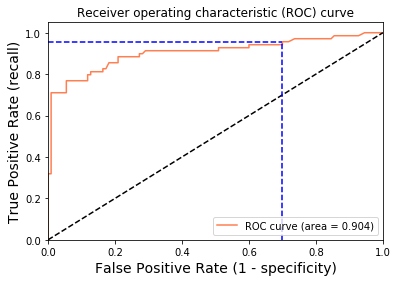

Using a threshold of 0.091 guarantees a sensitivity of 0.957 and a specificity of 0.300, i.e. a false positive rate of 70.00%.
